In [2]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
# Load the CSV file and Shape files
PoliceArrestsData = pd.read_csv('PoliceArrests.csv', sep=",")
neighborhoods = gpd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")

In [4]:
# Datetime Libraries to Filter
PoliceArrestsData['ARRESTTIME'] = pd.to_datetime(PoliceArrestsData['ARRESTTIME'], errors='coerce')

# Group and Display by Neighborhoods
neighborhood_arrests = PoliceArrestsData["INCIDENTNEIGHBORHOOD"].value_counts()
print(neighborhood_arrests.head(5))

INCIDENTNEIGHBORHOOD
Central Business District    4440
South Side Flats             3497
Carrick                      2352
East Allegheny               2217
Homewood South               2090
Name: count, dtype: int64


In [5]:
# Convert arrest data into a DataFrame

arrests_df = neighborhood_arrests.reset_index()
arrests_df.columns = ['INCIDENTNEIGHBORHOOD', 'ARREST_COUNT']

In [6]:
# Arrest Data on GeoDataFrame, adjusting missing values
neighborhoods = neighborhoods.merge(arrests_df, left_on='hood', right_on='INCIDENTNEIGHBORHOOD', how='left')
neighborhoods['ARREST_COUNT'] = neighborhoods['ARREST_COUNT'].fillna(0)

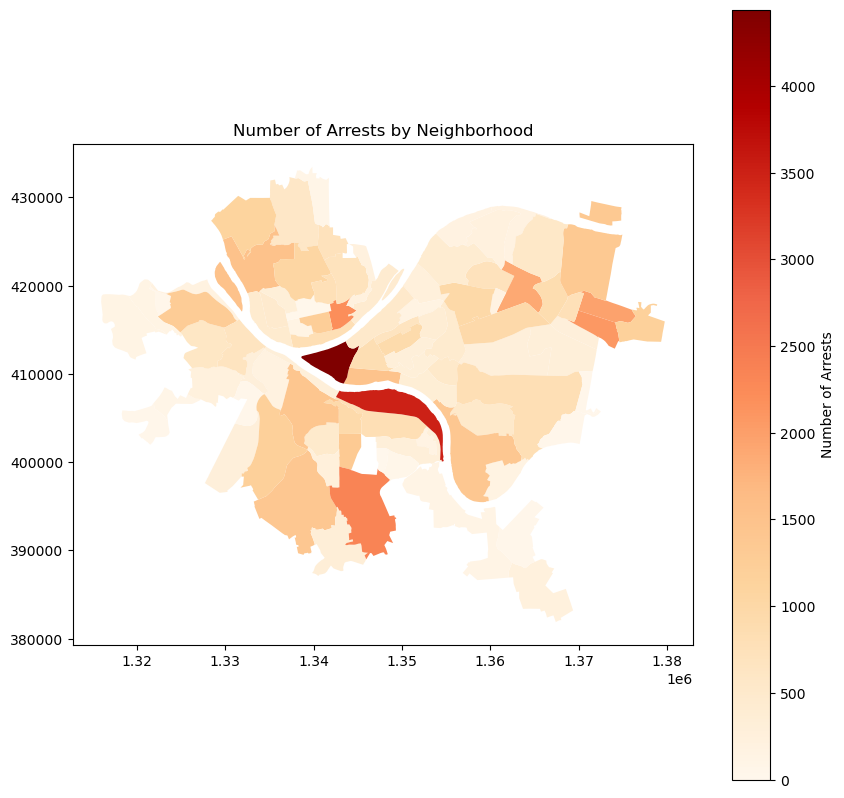

In [7]:
# Data Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
neighborhoods.plot(
    column='ARREST_COUNT', cmap='OrRd', legend=True, 
    legend_kwds={'label': "Number of Arrests"}, ax=ax
)
ax.set_title("Number of Arrests by Neighborhood")
plt.show()

In [45]:
least_incidents = arrests_df.sort_values(by='ARREST_COUNT').head(10)  # Sorting in ascending order

Text(0, 0.5, 'Number of Incidents')

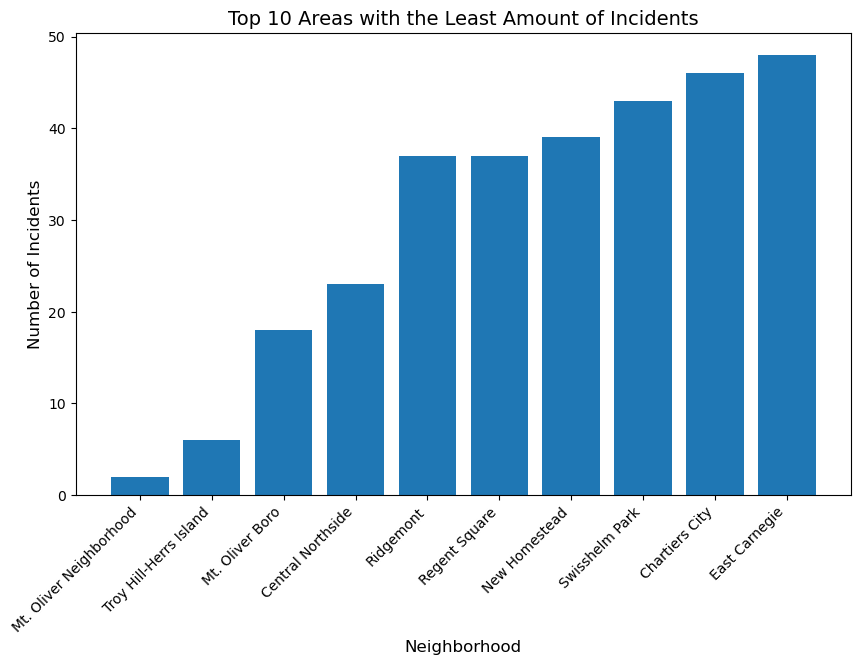

In [47]:
least_incidents = arrests_df.sort_values(by='ARREST_COUNT').head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(least_incidents['INCIDENTNEIGHBORHOOD'], least_incidents['ARREST_COUNT'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Areas with the Least Amount of Incidents", fontsize=14)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)

In [36]:
plt.show()
print("Top 10 Areas with the Least Amount of Incidents:")
print(least_incidents)

Top 10 Areas with the Least Amount of Incidents:
       INCIDENTNEIGHBORHOOD  ARREST_COUNT
97  Mt. Oliver Neighborhood             2
96   Troy Hill-Herrs Island             6
95          Mt. Oliver Boro            18
94        Central Northside            23
92                Ridgemont            37
93            Regent Square            37
91            New Homestead            39
90           Swisshelm Park            43
89           Chartiers City            46
88            East Carnegie            48
